# Introduction to Convolutional Neural Network and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car infront.

### Get the data

The dataset is originally form Kaggle's [food 101](https://www.kaggle.com/datasets/dansbecker/food-101) dataset which contains 101 different classes of foods.

However, here we're just using two classes(pizza 🍕 and steak 🥩)

> 🗝️**Note:** We start with a smaller dataset so we can experiment quickly and figure out what works and what does not.

**Data Modification Code:** [Github](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)

In [102]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-11-13 05:00:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.207, 209.85.200.207, 74.125.124.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   205MB/s    in 0.5s    

2023-11-13 05:00:10 (205 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any ML project is becoming one with the data.

And for a computer vision project, this usually means visualizing many samples of your data.

In [103]:
!ls pizza_steak

test  train


In [104]:
!ls pizza_steak/train

pizza  steak


In [105]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [106]:
# find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [107]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [108]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['199019.jpg']
Image shape: (512, 512, 3)


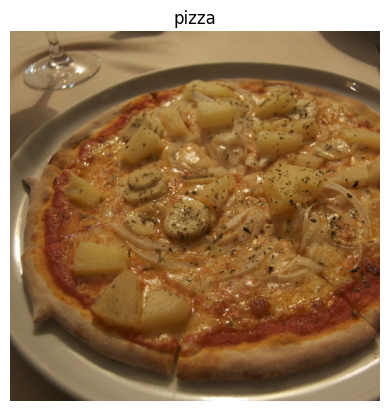

In [109]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [110]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[169, 139, 101],
        [170, 140, 102],
        [170, 140, 102],
        ...,
        [ 43,  33,  23],
        [ 42,  32,  22],
        [ 42,  32,  22]],

       [[169, 139, 101],
        [169, 139, 101],
        [170, 140, 102],
        ...,
        [ 45,  35,  25],
        [ 44,  34,  24],
        [ 44,  34,  24]],

       [[168, 140, 101],
        [168, 140, 101],
        [168, 140, 101],
        ...,
        [ 47,  37,  27],
        [ 46,  36,  26],
        [ 46,  36,  26]],

       ...,

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 92,  76,  61],
        [ 85,  71,  58],
        [ 81,  67,  54]],

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 81,  67,  54],
        [ 76,  62,  49],
        [ 72,  58,  45]],

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 75,  61,  4

## Normalization

Turn all the pixel values from 0-1 is known as Normalization.

Normalizing input data helps the neural network converge faster during training. When input data has a mean close to zero and a standard deviation close to one, the weights and biases of the network can be updated more efficiently. This is especially important when using gradient-based optimization methods like stochastic gradient descent (SGD) because it prevents updates from being too small or too large, which can slow down training or even prevent convergence.

In [111]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.6627451 , 0.54509804, 0.39607843],
        [0.66666667, 0.54901961, 0.4       ],
        [0.66666667, 0.54901961, 0.4       ],
        ...,
        [0.16862745, 0.12941176, 0.09019608],
        [0.16470588, 0.1254902 , 0.08627451],
        [0.16470588, 0.1254902 , 0.08627451]],

       [[0.6627451 , 0.54509804, 0.39607843],
        [0.6627451 , 0.54509804, 0.39607843],
        [0.66666667, 0.54901961, 0.4       ],
        ...,
        [0.17647059, 0.1372549 , 0.09803922],
        [0.17254902, 0.13333333, 0.09411765],
        [0.17254902, 0.13333333, 0.09411765]],

       [[0.65882353, 0.54901961, 0.39607843],
        [0.65882353, 0.54901961, 0.39607843],
        [0.65882353, 0.54901961, 0.39607843],
        ...,
        [0.18431373, 0.14509804, 0.10588235],
        [0.18039216, 0.14117647, 0.10196078],
        [0.18039216, 0.14117647, 0.10196078]],

       ...,

       [[0.25882353, 0.19607843, 0.13333333],
        [0.25490196, 0.19215686, 0.12941176],
        [0.25098039, 0

🔑 **Note:** As we've discussed before, many machine learning models, including Neural Networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **Scale** (also referred to as **Normalize**) their pixel values by dividing the image arrays by 255. (Since 255 is the maximum pixel value.

## An End-to-End example (Video 7)

Let's build a Convolutional Neural Network(CNN) to find patterns in our images, more specifically
* Load our images
* Preprocessing images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

> 👀**Note:** Check out the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) and [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.89171&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).


In [112]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocessing data (get all of the pixel values between 0 & 1, also known as normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 181ms/step - loss: 0.5497 - accuracy: 0.7487 - val_loss: 0.4166 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4454 - accuracy: 0.8007 - val_loss: 0.3728 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.4066 - accuracy: 0.8227 - val_loss: 0.3838 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3696 - accuracy: 0.8520 - val_loss: 0.3974 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.3031 - accuracy: 0.8820 - val_loss: 0.3167 - val_accuracy: 0.8680


> 🔑**Note:** CPU needed 90 seconds for first epoch to complete and GPU only 22.

### Using the same model as before

Let's replicate the model we've build in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.89171&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [113]:
# train_data

In [114]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 119ms/step - loss: 1.4286 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 167ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 161ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [115]:
# Get a summary of model 2
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 4)                 602116    
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model 1), model_2 performs terribly... let's try to improve it..

In [116]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 168ms/step - loss: 4.0815 - accuracy: 0.6260 - val_loss: 1.4489 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 7s 139ms/step - loss: 1.1205 - accuracy: 0.6820 - val_loss: 1.4279 - val_accuracy: 0.5760
Epoch 3/5
47/47 [==============================] - 7s 149ms/step - loss: 0.7436 - accuracy: 0.7207 - val_loss: 0.8310 - val_accuracy: 0.5960
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.7491 - accuracy: 0.7160 - val_loss: 0.6943 - val_accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 8s 163ms/step - loss: 0.8096 - accuracy: 0.7180 - val_loss: 0.4376 - val_accuracy: 0.7800


In [117]:
# Summary of model_3
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 150528)            0         
                                                                 
 dense_11 (Dense)            (None, 100)               15052900  
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑**Note:** You can think of trainable parameters as **patters a model can learn form data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between differnt **features** in an images.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scalling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2916967.jpg']
Image shape: (512, 512, 3)
['3882444.jpg']
Image shape: (512, 512, 3)


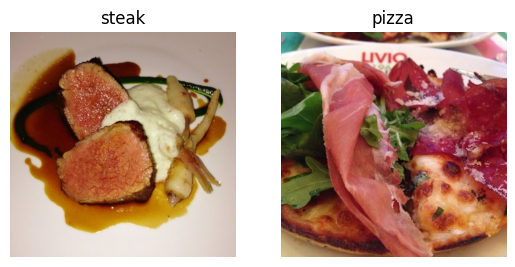

In [118]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [119]:
# Difine directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

our next step is to turn our data into **Batches**.

**Batch**: A batch is a small subset of data. Rather than look at all 10,000 imges at a time, a model might only look at 32 (default batch size) at a time.

it does this for few reasons:
1. 10,000 or more images might not fit into the memory of our processor or GPU at a time.
2. Trying to learn the patters in 10,000 images in one hit cloud result in the model not being able to learn very well.

But why batch size is 32? The researchers says so.

[Yann LeCun](https://twitter.com/ylecun?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor)

In [120]:
!nvidia-smi

Mon Nov 13 05:02:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    27W /  70W |   2889MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [121]:
# Create train and test data generated and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [122]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224), #(height, width)
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [123]:
# Get a sample of a train data batch
images, labels = train_data.next()# get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [124]:
# How many batches are there?
len(train_data), round(1500/32)

(47, 47)

In [125]:
# Get the first two images
# images[:2], images[0].shape

In [126]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑**Note:** In deep leaning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [127]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [128]:
# Create the model (this will be our baseline, a layer covolutional neural network)
model_4 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        strides=1,
        padding="valid",
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [129]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [130]:
# Get a summary of our model
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_27 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_28 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_10 (Flatten)        (None, 475240)            0         
                                                                 
 dense_15 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [131]:
# Check the lengths of training and test data gererators
len(train_data), len(test_data)

(47, 16)

In [132]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 137ms/step - loss: 1.2487 - accuracy: 0.6467 - val_loss: 0.4532 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.4259 - accuracy: 0.8080 - val_loss: 0.4408 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3366 - accuracy: 0.8647 - val_loss: 0.3780 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 7s 155ms/step - loss: 0.1751 - accuracy: 0.9500 - val_loss: 0.4221 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 8s 167ms/step - loss: 0.0760 - accuracy: 0.9833 - val_loss: 0.5500 - val_accuracy: 0.7640


In [133]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 90ms/step - loss: 0.5500 - accuracy: 0.7640


[0.5499550700187683, 0.7639999985694885]

### 5. Evaluating our Model

It looks like our model is learning something, let's evaluate it.

<Axes: >

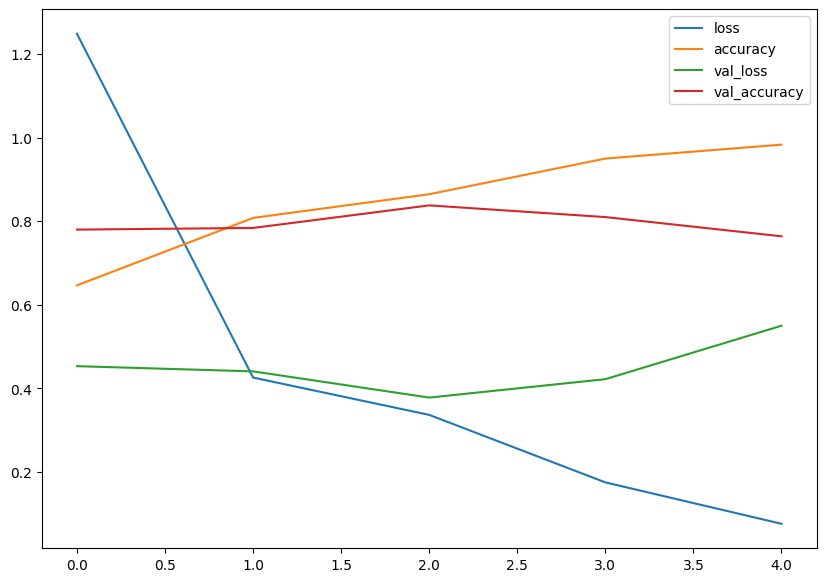

In [134]:
# Plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [135]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validaion metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset **too well** and thus the model's ability to generalize to unseen data will be diminished.

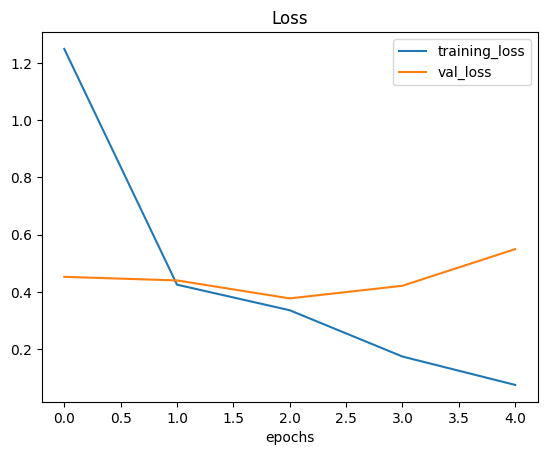

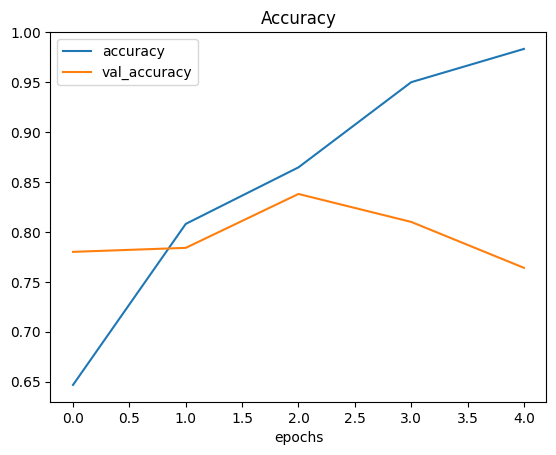

In [136]:
# Checkout the loss and accuracy of model_4
plot_loss_curves(history_4)

🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be overfitting.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a large model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the outpur of our flatterned layer


Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2d)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization.**

In [137]:
# Creating the model (This is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [138]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [139]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 149ms/step - loss: 0.6253 - accuracy: 0.6440 - val_loss: 0.5109 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4858 - accuracy: 0.7767 - val_loss: 0.3691 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4486 - accuracy: 0.8040 - val_loss: 0.3472 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4038 - accuracy: 0.8193 - val_loss: 0.3248 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3881 - accuracy: 0.8400 - val_loss: 0.3462 - val_accuracy: 0.8620


In [140]:
# Get a summary of our model with MaxPooling
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 26, 26, 10)      

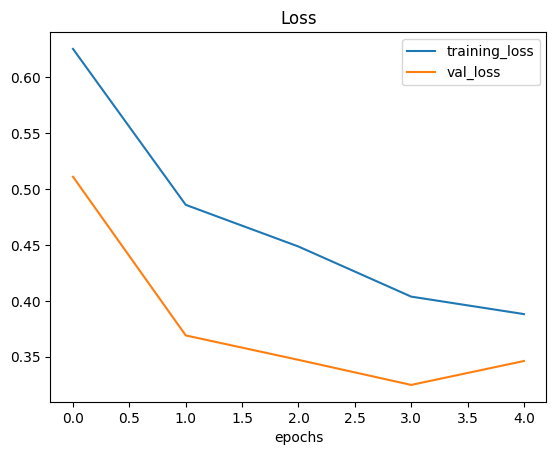

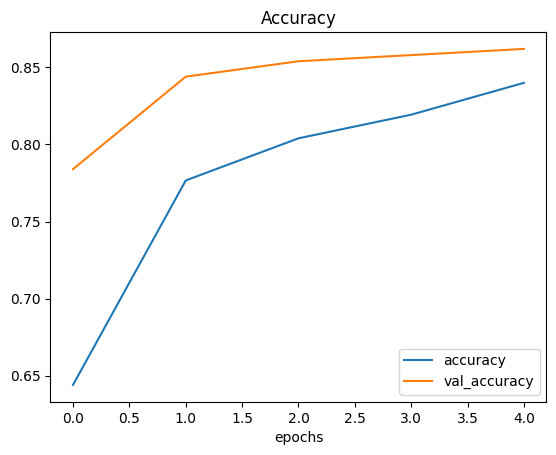

In [141]:
# Plot loss curve
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [142]:
# Create ImageDataGenerator training with augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation for train dataset
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation.

In [143]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # For learning purpuses 'False'

# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create nor-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally ... let's visualize some augmented data... !

In [144]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels are not augmented... only data (IMG) is

Showing image number: 27


(-0.5, 223.5, 223.5, -0.5)

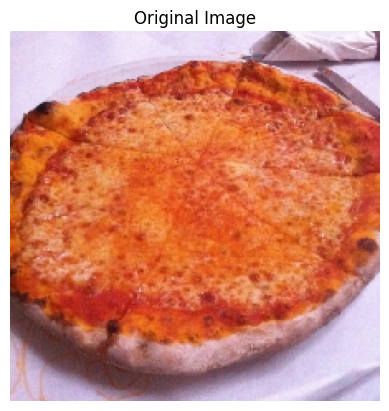

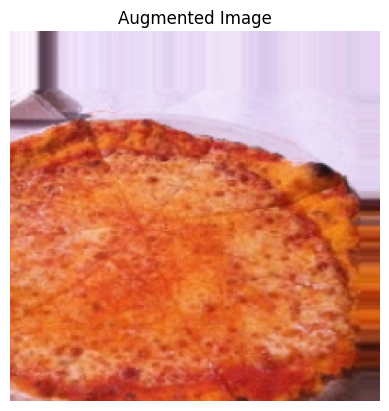

In [145]:
# Show the original image and augmented image
import random
random_number = random.randint(0, 31)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [146]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 525ms/step - loss: 0.7772 - accuracy: 0.4920 - val_loss: 0.6868 - val_accuracy: 0.5300
Epoch 2/5
47/47 [==============================] - 28s 599ms/step - loss: 0.6959 - accuracy: 0.4480 - val_loss: 0.6817 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6875 - accuracy: 0.5047 - val_loss: 0.6771 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 28s 608ms/step - loss: 0.6955 - accuracy: 0.5067 - val_loss: 0.6803 - val_accuracy: 0.5900
Epoch 5/5
47/47 [==============================] - 25s 529ms/step - loss: 0.6976 - accuracy: 0.5447 - val_loss: 0.6926 - val_accuracy: 0.5260


In [147]:
model_6.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 26, 26, 10)      

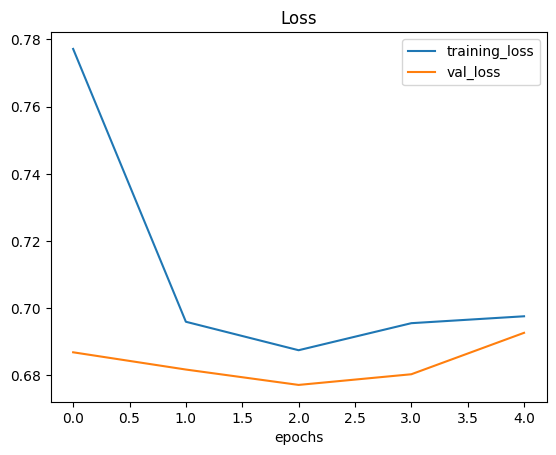

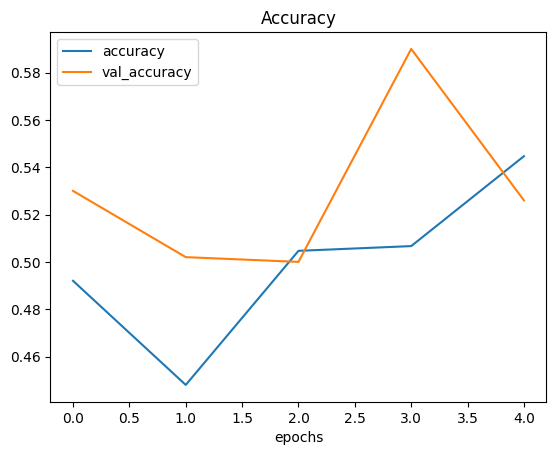

In [148]:
# Check training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model on it and see what happens.

In [149]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [150]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 550ms/step - loss: 0.6702 - accuracy: 0.5893 - val_loss: 0.5770 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 27s 573ms/step - loss: 0.5564 - accuracy: 0.7173 - val_loss: 0.3867 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 26s 543ms/step - loss: 0.4984 - accuracy: 0.7607 - val_loss: 0.4293 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 29s 631ms/step - loss: 0.4916 - accuracy: 0.7680 - val_loss: 0.3664 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 25s 532ms/step - loss: 0.4586 - accuracy: 0.7880 - val_loss: 0.3709 - val_accuracy: 0.8220


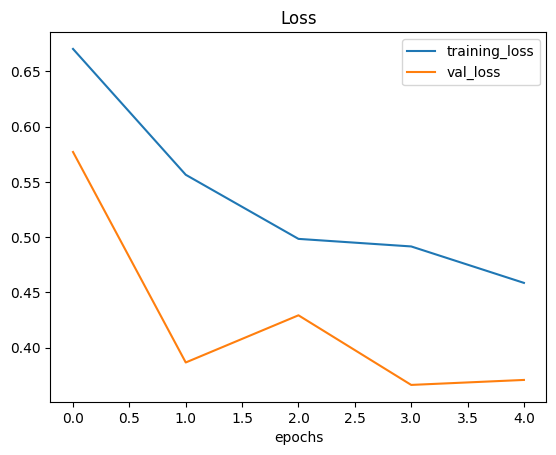

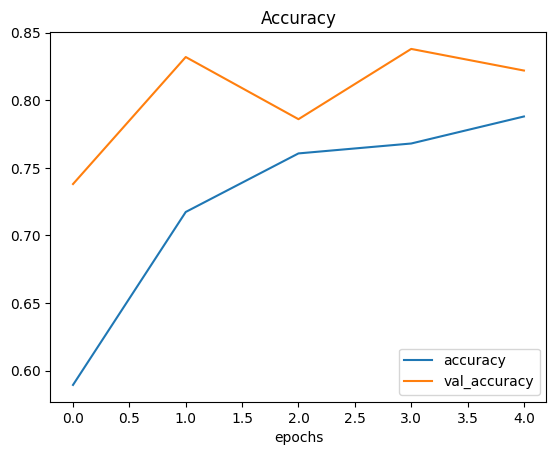

In [151]:
# Plot loss curves
plot_loss_curves(history_7)

🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat Until Satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` or `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 even 64)
* Train for longer (more epochs)
* Find an idel learning rate
* Get more data
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use cases

## Making a prediction with our trained model on our own custom data

In [152]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-11-13 05:09:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-11-13 05:09:38 (27.8 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

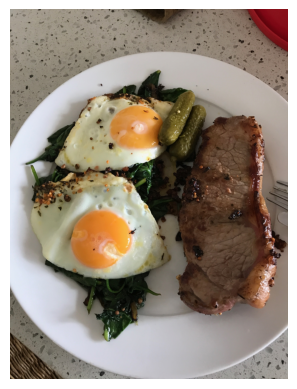

In [153]:
# View our example image
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [154]:
# Check the shape
steak.shape

(4032, 3024, 3)

> 🔑 **Note:** When you train a neural network and you want to make a predction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was train on.

In [155]:
# Create a function to import the image and resize it to be able to be used on with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [156]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")

In [157]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [158]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 73ms/step


array([[0.94324154]], dtype=float32)

In [159]:
# We can index the predicted class by rounding the predicted probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [160]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """
  # Import the target iamge and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 25ms/step


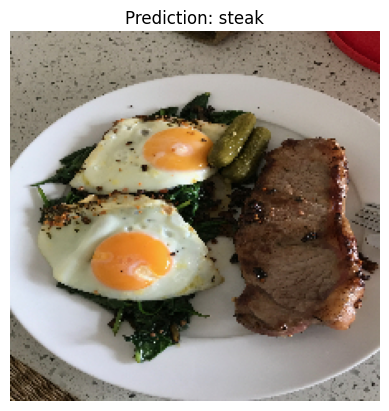

In [161]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2023-11-13 05:09:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-11-13 05:09:43 (37.5 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

1/1 [==============================] - 0s 19ms/step


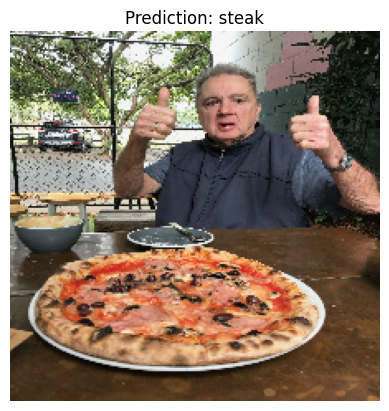

In [162]:
# Download pizza image too
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classed of food (multi-class classification)

1. Become one with the data
2. prerocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [163]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-13 05:09:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.207, 142.251.6.207, 108.177.121.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  43.1MB/s    in 5.4s    

2023-11-13 05:09:49 (92.0 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [164]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [165]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [166]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3621671.jpg']
Image shape: (512, 512, 3)


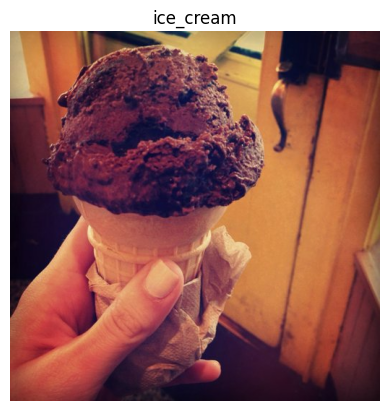

In [167]:
# Visualize
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [168]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale images
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

The [CNN explainer](https://poloclub.github.io/cnn-explainer/) website also works with 10 classes. How about we just take their model and use it for our own problem...!

Activation `softmax` in Dense layer because multi-class classification.

In [169]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (similar to CNN Explainer wesites model)
model_8 = Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## 4. Fit the model

In [170]:
# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 35s 142ms/step - loss: 2.1800 - accuracy: 0.1967 - val_loss: 2.1113 - val_accuracy: 0.2124
Epoch 2/5
235/235 [==============================] - 34s 145ms/step - loss: 1.9179 - accuracy: 0.3327 - val_loss: 1.9551 - val_accuracy: 0.3112
Epoch 3/5
235/235 [==============================] - 34s 143ms/step - loss: 1.4675 - accuracy: 0.5103 - val_loss: 2.0259 - val_accuracy: 0.3180
Epoch 4/5
235/235 [==============================] - 37s 156ms/step - loss: 0.8038 - accuracy: 0.7413 - val_loss: 2.9691 - val_accuracy: 0.2492
Epoch 5/5
235/235 [==============================] - 34s 144ms/step - loss: 0.3004 - accuracy: 0.9105 - val_loss: 3.7793 - val_accuracy: 0.2468


## 5. Evaluate the model

In [171]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 3.7793 - accuracy: 0.2468


[3.779254198074341, 0.2468000054359436]

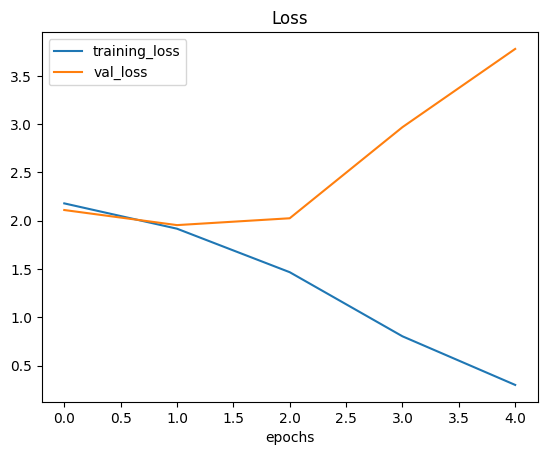

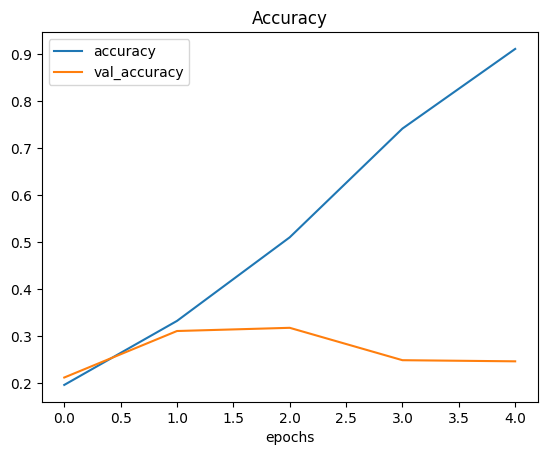

In [172]:
# Check out the model's loss curves
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

## 6. Adjust the model hyperparameters to beat the baseline/reduce overfitting

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce number of layers or reduce number of hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (withour altering the original data)
* **Use Transfer learning** - transfer learning leverages the patterns another model has learned on similar data to our own and allows you to use those patterns on our own dataset

In [173]:
# How about we try and simplify our model
# Let's try to remove 2 Conv2D layers
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 37s 149ms/step - loss: 2.1384 - accuracy: 0.2311 - val_loss: 2.0126 - val_accuracy: 0.2892
Epoch 2/5
235/235 [==============================] - 32s 134ms/step - loss: 1.8391 - accuracy: 0.3703 - val_loss: 1.8919 - val_accuracy: 0.3412
Epoch 3/5
235/235 [==============================] - 35s 149ms/step - loss: 1.4978 - accuracy: 0.5100 - val_loss: 1.9886 - val_accuracy: 0.3172
Epoch 4/5
235/235 [==============================] - 34s 144ms/step - loss: 1.0370 - accuracy: 0.6756 - val_loss: 2.1913 - val_accuracy: 0.2964
Epoch 5/5
235/235 [==============================] - 31s 131ms/step - loss: 0.5628 - accuracy: 0.8379 - val_loss: 2.5136 - val_accuracy: 0.2960


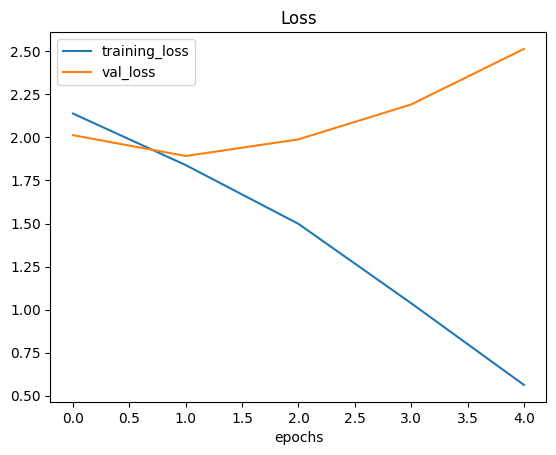

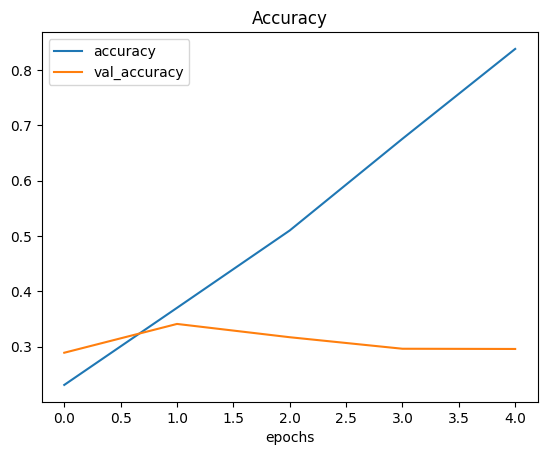

In [174]:
plot_loss_curves(history_9)

In [74]:
# model_8.summary(), model_9.summary()

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [75]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [76]:
# Let's create another model on augmented data
model_10 = tf.keras.models.clone_model(model_8)

# Compile
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [81]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 139s 572ms/step - loss: 2.2031 - accuracy: 0.1787 - val_loss: 2.0959 - val_accuracy: 0.2492
Epoch 2/5
235/235 [==============================] - 134s 572ms/step - loss: 2.1148 - accuracy: 0.2293 - val_loss: 1.9871 - val_accuracy: 0.2984
Epoch 3/5
235/235 [==============================] - 135s 573ms/step - loss: 2.0476 - accuracy: 0.2705 - val_loss: 1.8686 - val_accuracy: 0.3676
Epoch 4/5
235/235 [==============================] - 130s 553ms/step - loss: 2.0024 - accuracy: 0.2909 - val_loss: 1.8336 - val_accuracy: 0.3676
Epoch 5/5
235/235 [==============================] - 132s 564ms/step - loss: 1.9607 - accuracy: 0.3123 - val_loss: 1.8487 - val_accuracy: 0.3676


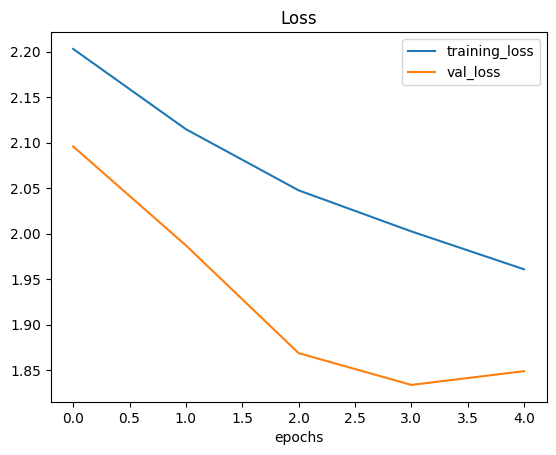

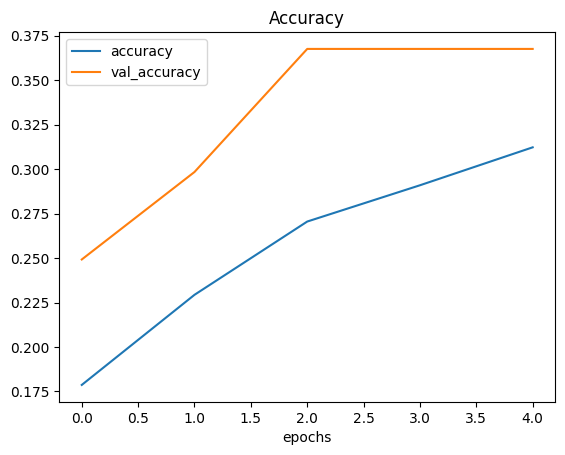

In [82]:
plot_loss_curves(history_10)

That looks much better, the loss curver are much closer to each other than baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

## 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

**HOW?**

By running lots of experiments, namely:
- Restructuring our model's architecture (increase layers/hidden units)
- Adjust the learning rate
- Try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- Training for longer (e.g. 10 epochs instead of 5)
- Try `Transfer Learning`

### Making a prediction with our trained model

Predict on custom images with model_10.

In [83]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [84]:
# Download some custome images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-11-13 04:33:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.07s   

2023-11-13 04:33:42 (45.9 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2023-11-13 04:33:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [89]:
# Reconfig pred_and_plot function for multi-class models
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """
  # Import the target iamge and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 29ms/step


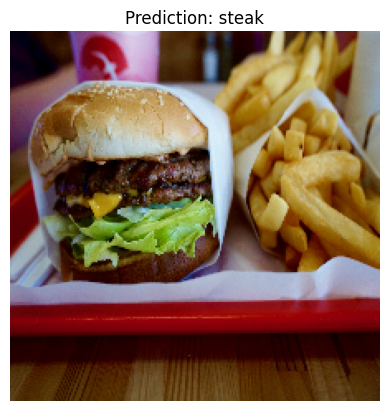

In [96]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

Looks like our model didn't perform well because the accuracy on test data was 0.3.

### Saving and loading model

In [98]:
# Save a model
model_10.save("saved_trained_model_10")

In [99]:
# Load in a saved model
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")

1/1 [==============================] - 0s 127ms/step


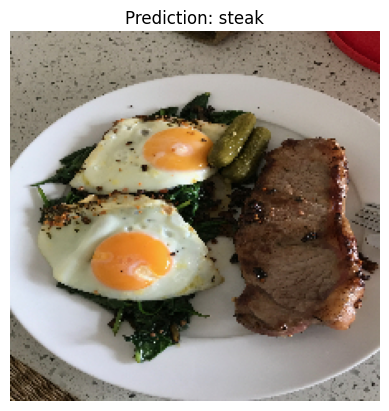

In [100]:
pred_and_plot(loaded_model_10,
              "03-steak.jpeg",
              class_names)